# Comparing Stochastic Gradient Descent & Newton's Method
## Question 2
임의의 볼록 함수를 정의하고 그것의 최소값을 구하시오.

**2-1.** 정의한 볼록 함수 최솟값 문제를 SGD를 적용하여 해결하시오.

**2-2.** 정의한 볼록 함수 최솟값 문제를 다시 Newton method를 적용하여 해결하시오.

**2-3.** 두 방법을 적용한 것을 비교 분석하시오.

## Load Libraries

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Define Variable and Loss Function

$$ y = x^2/4 $$

In [2]:
def initialize_params(init_type=True):
    if init_type == True:
        x = tf.Variable(2.0)
        y = lambda: (x ** 2)/4.0
    else:
        x = 2
        y = (x ** 2)/4.0
    
    learning_rate = 0.01
    epoch = 2000
    
    return x, y, learning_rate, epoch

## 2-1. 볼록 함수 최솟값 문제에 SGD 적용하기

- `2가지 기법`을 적용하여 풀어보았습니다.
    1. using keras.optimizers.SGD
    2. using manually defined SGD

### using keras.optimizers.SGD

In [3]:
# initialize
x, y, learning_rate, epoch = initialize_params()

keras_sgd_x = []
keras_sgd_y = []

# define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

start = time.time()
# train
for i in range(epoch):
    step_count = opt.minimize(y, [x]).numpy()
    
    curr_x = x.numpy()
    curr_y = y()
    
    keras_sgd_x.append(curr_x)
    keras_sgd_y.append(curr_y)
    
    if i % 500 == 0 :
        print('%d th epoch >> var : %.3f, loss : %.5f'%(step_count-1, curr_x, curr_y))

end = time.time()
print("=========================")
print(f"TRAIN ENED (TIME %.4f s)"%(end-start))

# Print Final Result
print('%d th epoch >> var : %.3f, loss : %.5f'%(step_count, curr_x, curr_y))

0 th epoch >> var : 1.990, loss : 0.99002
500 th epoch >> var : 0.162, loss : 0.00659
1000 th epoch >> var : 0.013, loss : 0.00004
1500 th epoch >> var : 0.001, loss : 0.00000
TRAIN ENED (TIME 2.0907 s)
2000 th epoch >> var : 0.000, loss : 0.00000


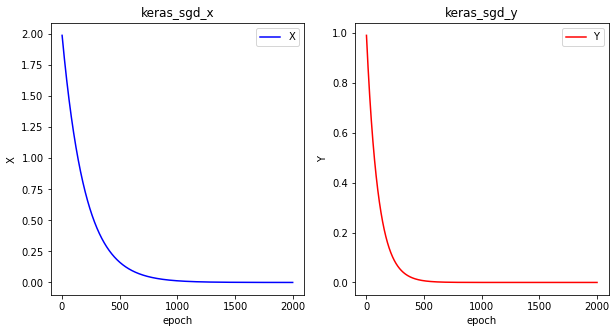

In [4]:
# X/Y
plt.figure(figsize=(10,5))
epochs = list(range(1,epoch+1))

plt.subplot(1, 2, 1)
plt.plot(epochs, keras_sgd_x, label='X', color = 'b')
plt.xlabel('epoch')
plt.ylabel('X')
plt.title('keras_sgd_x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, keras_sgd_y, label='Y', color = 'r')
plt.xlabel('epoch')
plt.ylabel('Y')
plt.title('keras_sgd_y')
plt.legend()

plt.show()

### using manually defined SGD code (in-class code)

X is updated as below:

$$x_{n+1} = x_n -(LearningRate)*{f′(x_n)} $$

In [5]:
# initialize
x, y, learning_rate, epoch = initialize_params(False)

manual_sgd_x = []
manual_sgd_y = []

start = time.time()

# train
for i in range(epoch):    
    # derivate
    dydx = x/2
    
    # update x
    x = x - learning_rate*dydx
    y = x**2/4 
    
    manual_sgd_x.append(x)
    manual_sgd_y.append(y)
    
    if i % 500 == 0 :
        print('%d th epoch >> var : %.3f, loss : %.5f'%(i, x, y))

end = time.time()
print("=========================")
print(f"TRAIN ENED (TIME %.4f s)"%(end-start))        

# Print Final Result
print('%d th epoch >> var : %.3f, loss : %.5f'%(i+1, x, y))

0 th epoch >> var : 1.990, loss : 0.99003
500 th epoch >> var : 0.162, loss : 0.00659
1000 th epoch >> var : 0.013, loss : 0.00004
1500 th epoch >> var : 0.001, loss : 0.00000
TRAIN ENED (TIME 0.0015 s)
2000 th epoch >> var : 0.000, loss : 0.00000


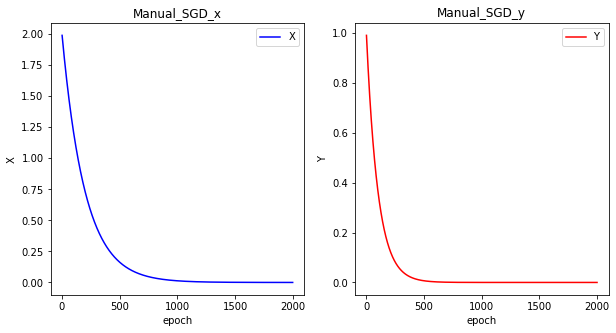

In [10]:
# X/Y
plt.figure(figsize=(10,5))
epochs = list(range(1,epoch+1))

plt.subplot(1, 2, 1)
plt.plot(epochs, manual_sgd_x, label='X', color = 'b')
plt.xlabel('epoch')
plt.ylabel('X')
plt.title('Manual_SGD_x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, manual_sgd_y, label='Y', color = 'r')
plt.xlabel('epoch')
plt.ylabel('Y')
plt.title('Manual_SGD_y')
plt.legend()

plt.show()

## 2-2. 볼록 함수 최솟값 문제에 Newton Method 적용하기

### using manually defined Newton's Method code

X is updated as below:

$$x_{n+1} = x_n -\frac{f(x_n)}{f′(x_n)} $$

In [7]:
# initialize
x, y, learning_rate, epoch = initialize_params(False)

manual_newton_x = []
manual_newton_y = []

start = time.time()

# train
for i in range(epoch):    
    # y and derivate of y
    y = x**2/4 
    dydx = x/2
    
    # update x
    x = x - (y/dydx)
    y = x**2/4 
    
    manual_newton_x.append(x)
    manual_newton_y.append(y)
    
    if i % 500 == 0 :
        print('%d th epoch >> var : %.3f, loss : %.5f'%(i, x, y))

end = time.time()
print("=========================")
print(f"TRAIN ENED (TIME %.4f s)"%(end-start))        
        
# Print Final Result
print('%d th epoch >> var : %.3f, loss : %.5f'%(i+1, x, y))

0 th epoch >> var : 1.000, loss : 0.25000
500 th epoch >> var : 0.000, loss : 0.00000
1000 th epoch >> var : 0.000, loss : 0.00000
1500 th epoch >> var : 0.000, loss : 0.00000
TRAIN ENED (TIME 0.0018 s)
2000 th epoch >> var : 0.000, loss : 0.00000


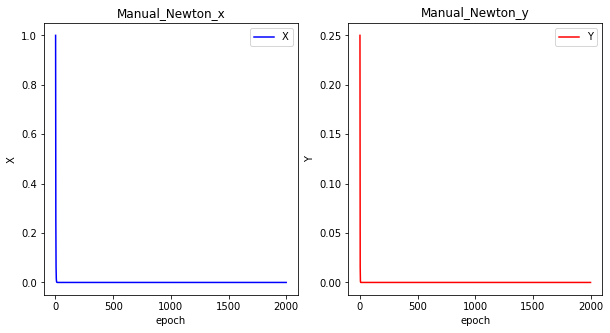

In [9]:
# X/Y
plt.figure(figsize=(10,5))
epochs = list(range(1,epoch+1))

plt.subplot(1, 2, 1)
plt.plot(epochs, manual_newton_x, label='X', color = 'b')
plt.xlabel('epoch')
plt.ylabel('X')
plt.title('Manual_Newton_x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, manual_newton_y, label='Y', color = 'r')
plt.xlabel('epoch')
plt.ylabel('Y')
plt.title('Manual_Newton_y')
plt.legend()

plt.show()

## 2-3. 두 방법을 적용한 것을 비교 분석하기
- 몇 epoch에 수렴하는 가를 비교를 위해 조건을 추가하여 비교 수행

### SGD Manual

In [13]:
# initialize
x, y, learning_rate, epoch = initialize_params(False)

# 조건
epsilon =  1e-10

manual_sgd_x = []
manual_sgd_y = []

start = time.time()

# train
for i in range(epoch):    
    # derivate
    dydx = x/2
    
    # update x
    x = x - learning_rate*dydx
    y = x**2/4 
    delta = abs(0-y)
    
    manual_sgd_x.append(x)
    manual_sgd_y.append(y)
    
    if delta < epsilon:
        print(f'TRAING STOPPED AT {i+1}')
        break
    
    if i % 500 == 0 :
        print('%d th epoch >> var : %.3f, loss : %.5f'%(i, x, y))

end = time.time()
print("=========================")
print(f"TRAIN ENED (TIME %.4f s)"%(end-start))        

# Print Final Result
print('%d th epoch >> var : %.3f, loss : %.5f'%(i+1, x, y))

0 th epoch >> var : 1.990, loss : 0.99003
500 th epoch >> var : 0.162, loss : 0.00659
1000 th epoch >> var : 0.013, loss : 0.00004
1500 th epoch >> var : 0.001, loss : 0.00000
TRAIN ENED (TIME 0.0058 s)
2000 th epoch >> var : 0.000, loss : 0.00000


In [14]:
# initialize
x, y, learning_rate, epoch = initialize_params(False)

# 조건
epsilon =  1e-10

manual_newton_x = []
manual_newton_y = []

start = time.time()

# train
for i in range(epoch):    
    # y and derivate of y
    y = x**2/4 
    dydx = x/2
    
    # update x
    x = x - (y/dydx)
    y = x**2/4 
    delta = abs(0-y)
    
    manual_newton_x.append(x)
    manual_newton_y.append(y)
    
    if delta < epsilon:
        print(f'TRAING STOPPED AT {i+1}')
        break
    
    if i % 500 == 0 :
        print('%d th epoch >> var : %.3f, loss : %.5f'%(i, x, y))

end = time.time()
print("=========================")
print(f"TRAIN ENED (TIME %.4f s)"%(end-start))        
        
# Print Final Result
print('%d th epoch >> var : %.3f, loss : %.5f'%(i+1, x, y))

0 th epoch >> var : 1.000, loss : 0.25000
TRAING STOPPED AT 17
TRAIN ENED (TIME 0.0010 s)
17 th epoch >> var : 0.000, loss : 0.00000
